In [1]:
!pip install yfinance thaifin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 38.5 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.2.3
    Uninstalling tenacity-8.2.3:
      Successfully uninstalled tenacity-8.2.3
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.6.4
    Uninstalling pydantic-2.6.4:
      Successfully uninstalled pydantic-2.6.4
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.3.3
    Uninstalling cachetools-5.3.3:
      Successfully uninstalled cachetools-5.3.3
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviou

In [2]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt

import time
from datetime import date

import requests
from bs4 import BeautifulSoup

import statistics
from lxml import html
from thaifin import Stock
import re
from tqdm import tqdm
import math

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Question 1: [Macro] Average growth of GDP in 2023

**What is the average growth (in %) of GDP in 2023?**

Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1).
Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago). Find the average YoY growth in 2023 (average from 4 YoY numbers).
Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer  5.7

In [ ]:
start = date(2022, 1, 1)
end= date(2023, 12, 31)
print(f'Year = {end.year}; month= {end.month}; day={end.day}')
print(f'Period for indexes: {start} to {end} ')


gdp = pdr.DataReader("GDPC1", "fred", start=start, end=end)
gdp.tail()

Year = 2023; month= 12; day=31
Period for indexes: 2022-01-01 to 2023-12-31 


,GDPC1
DATE,
2022-10-01,21989.981
2023-01-01,22112.329
2023-04-01,22225.350
2023-07-01,22490.692
2023-10-01,22679.255


In [ ]:
gdp['YoY'] = gdp['GDPC1'].pct_change(4) * 100

In [ ]:
gdp.shape #Data is Quarter

(8, 2)

In [ ]:
gdp['YoY'].mean()

2.5404433928676253

### Question 2. [Macro] Inverse "Treasury Yield"

**Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.**


Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2,
 https://fred.stlouisfed.org/series/DGS10). Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.

(Additional: think about what does the "inverted yield curve" mean for the market and investors? do you see the same thing in your country/market of interest? Do you think it can be a good predictive feature for the models?)

In [ ]:
start_date = date(2000, 1, 1)

dgs2 = pdr.DataReader("DGS2", "fred", start=start_date)
dgs10 = pdr.DataReader("DGS10", "fred", start=start_date)

In [ ]:
df_dgs = dgs10.join(dgs2, how='inner', lsuffix='_dgs10', rsuffix='_dgs2')

df_dgs['yield_diff'] = df_dgs['DGS10'] - df_dgs['DGS2']

In [ ]:
df_dgs['yield_diff'].min()

-1.0800000000000005

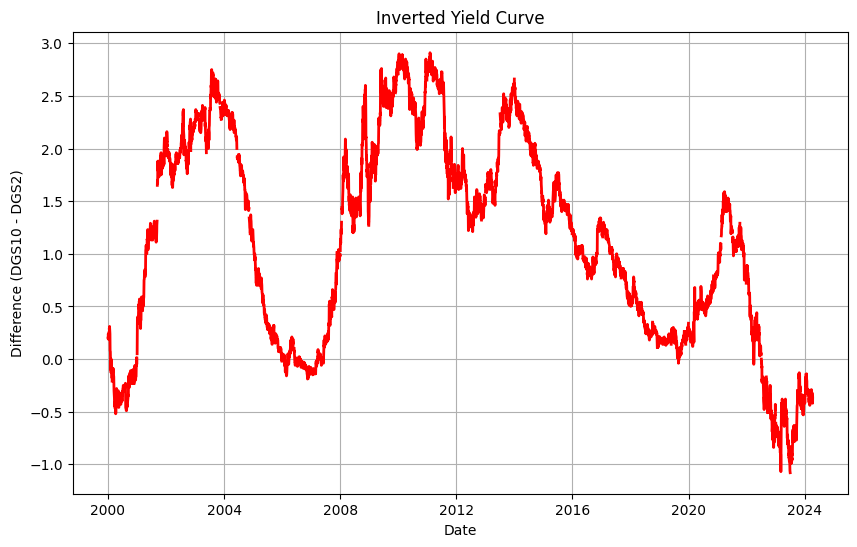

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_dgs.index, df_dgs['yield_diff'], color='red', linewidth=2)
plt.title('Inverted Yield Curve')
plt.xlabel('Date')
plt.ylabel('Difference (DGS10 - DGS2)')
plt.grid(True)
plt.show()

### Question 3. [Index] Which Index is better recently?

**Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)**

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/). Compare 5Y growth for both (between 2019-04-09 and 2024-04-09). Select the higher growing index and write down the growth in % (closest integer %). E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.

(Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)

In [ ]:
sp500= yf.download("^GSPC", start="2019-04-09", end="2024-04-09")
ipc_mexico = yf.download("^MXX", start="2019-04-09", end="2024-04-09")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
sp500_start_price = sp500['Adj Close'][0]
sp500_end_price = sp500['Adj Close'][-1]
sp500_growth = ((sp500_end_price / sp500_start_price) - 1) * 100

ipc_mexico_start_price = ipc_mexico ['Adj Close'][0]
ipc_mexico_end_price = ipc_mexico ['Adj Close'][-1]
ipc_mexico_growth = ((ipc_mexico_end_price / ipc_mexico_start_price) - 1) * 100

In [ ]:
sp500_growth

80.75151917783086

In [ ]:
ipc_mexico_growth

28.43377484045295

In [ ]:
years = 5

sp500_cagr = ((sp500_end_price / sp500_start_price) ** (1/years)) - 1

ipc_mexico_cagr = ((ipc_mexico_end_price / ipc_mexico_start_price) ** (1/years)) - 1

print(f"The CAGR for S&P 500 (^GSPC) over the past {years} years is {sp500_cagr:.2%}.")
print(f"The CAGR for IPC Mexico (^MXX) over the past {years} years is {ipc_mexico_cagr:.2%}.")

The CAGR for S&P 500 (^GSPC) over the past 5 years is 12.57%.
The CAGR for IPC Mexico (^MXX) over the past 5 years is 5.13%.


### Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks


**Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023**


Download the 2023 daily OHLCV data on Yahoo Finance for top5 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/): 2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.

Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history

Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value.
Round the result to two decimal places (e.g. 0.1575 will be 0.16)

(Additional: why this may be important for your research?)

In [ ]:
tickers = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

In [ ]:
data = yf.download(tickers, start='2023-01-01', end='2023-12-31')

[*********************100%%**********************]  6 of 6 completed


In [ ]:
adj_close_prices = data['Adj Close']

max_prices = adj_close_prices.max(axis=0)
min_prices = adj_close_prices.min(axis=0)

range_ratios = (max_prices - min_prices) / max_prices

range_ratios_df = pd.DataFrame({'ticker': range_ratios.index, 'LRR': range_ratios.values})

In [ ]:
range_ratios_df

,ticker,LRR
0,2222.SR,0.213931
1,AAPL,0.372444
2,BRK-B,0.207758
3,GOOG,0.392452
4,JPM,0.282499
5,MSFT,0.424207


### Question 5. [Stocks] Dividend Yield
**Find the largest dividend yield for the same set of stocks**

Use the same list of companies (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM) and download all dividends paid in 2023.
You can use `get_actions()` method or `.dividends` field in yfinance library (https://github.com/ranaroussi/yfinance?tab=readme-ov-file#quick-start)

Sum up all dividends paid in 2023 per company and divide each value by the closing price (Adj.Close) at the last trading day of the year.

Find the maximm value in % and round to 1 digit after the decimal point. (E.g., if you obtained $1.25 dividends paid and the end year stock price is $100, the dividend yield is 1.25% -- and your answer should be equal to 1.3)

In [ ]:
epi = yf.Ticker('2222.SR')
df=epi.get_actions()
df = df.loc['2023']
df['Dividends'].sum()
data = yf.download('2222.SR', start='2023-01-01', end='2023-12-31')
data['Adj Close'].iloc[-1]

[*********************100%%**********************]  1 of 1 completed


32.87778854370117

In [ ]:
company = yf.Ticker('GOOG')
tmp = company.get_actions()

In [ ]:
tmp

,Dividends,Stock Splits
Date,,
2014-03-27 00:00:00-04:00,0.0,2.002000
2015-04-27 00:00:00-04:00,0.0,1.002746
2022-07-18 00:00:00-04:00,0.0,20.000000


In [ ]:
tickers = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

data_list = []

for ticker in tickers:
    company = yf.Ticker(ticker)
    try:
        dividends = company.get_actions()['Dividends']
        dividends_2023 = dividends.loc['2023']
    except KeyError:
        total_dividends = 0
    else:
        total_dividends = dividends_2023.sum()

    data = yf.download(ticker, start='2023-01-01', end='2023-12-31')

    last_close_price = data['Adj Close'].iloc[-1]

    dividend_ratio = (total_dividends / last_close_price)*100

    data_list.append({'Stock': ticker, 'Dividend/LastPrice': dividend_ratio})

output_df = pd.DataFrame(data_list)

output_df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Stock,Dividend/LastPrice
0,2222.SR,2.770150
1,BRK-B,0.000000
2,AAPL,0.494059
3,MSFT,0.743314
4,GOOG,0.000000
5,JPM,2.409608


### Question 6. [Exploratory] Investigate new metrics

**Free text answer**

Download and explore a few additional metrics or time series that might be valuable for your project and write down why (briefly).

In [3]:
th_stock=Stock.list_symbol()

In [4]:
len(th_stock)

895

In [5]:
th_stock = [symbol + ".BK" for symbol in th_stock]

In [6]:
def populate_with_info(data, stock_info):
    # print(stock_info)
    data['Symbol'].append(stock_info['symbol'])
    data['Name'].append(stock_info['longName'])
    # Convert numbers to a human readable format
    data['Market Cap'].append(human_format(stock_info['marketCap']))
    data['Price'].append(stock_info['currentPrice'])

    # Could be that some indicators are not available; use NaN if this is the case

    # Valuation ratios

    if 'priceToBook' in stock_info:
        data['PB'].append(stock_info['priceToBook'])
    else:
        data['PB'].append(np.nan)

    if 'forwardEps' in stock_info:
        data['EPS fwd'].append(stock_info['forwardEps'])
    else:
        data['EPS fwd'].append(np.nan)

    if 'forwardPE' in stock_info:
        data['PE fwd'].append(stock_info['forwardPE'])
    else:
        data['PE fwd'].append(np.nan)

    if 'pegRatio' in stock_info:
        data['PEG'].append(stock_info['pegRatio'])
    else:
        data['PEG'].append(np.nan)

    # Solvency financial ratios

    if 'debtToEquity' in stock_info:
        data['D2E'].append(stock_info['debtToEquity'])
    else:
        data['D2E'].append(np.nan)

    # Profitability Ratios

    if 'returnOnEquity' in stock_info:
        data['ROE'].append(stock_info['returnOnEquity'])
    else:
        data['ROE'].append(np.nan)

    if ('freeCashflow' in stock_info) and ('marketCap' in stock_info):
        fcfy = (stock_info['freeCashflow']/stock_info['marketCap']) * 100
        data['FCFY'].append(round(fcfy, 2))
    else:
        data['FCFY'].append(np.nan)

    # Liquidity ratios

    if 'currentRatio' in stock_info:
        data['CR'].append(stock_info['currentRatio'])
    else:
        data['CR'].append(np.nan)

    if 'quickRatio' in stock_info:
        data['QR'].append(stock_info['quickRatio'])
    else:
        data['QR'].append(np.nan)

    # Other info (non ratios)

    if 'dividendYield' in stock_info:
        data['DY'].append(stock_info['dividendYield']*100)
    else:
        data['DY'].append(0.0)

    if 'beta' in stock_info:
        data['Beta'].append(stock_info['beta'])
    else:
        data['Beta'].append(np.nan)

    if 'fiftyTwoWeekLow' in stock_info:
        data['52w Low'].append(stock_info['fiftyTwoWeekLow'])
    else:
        data['52w Low'].append(np.nan)

    if 'fiftyTwoWeekHigh' in stock_info:
        data['52w High'].append(stock_info['fiftyTwoWeekHigh'])
    else:
        data['52w High'].append(np.nan)

In [7]:
def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0.'), ['', 'K', 'M', 'B', 'T'][magnitude])

In [8]:
def roce(ticker):
    income_stm = ticker.income_stmt
    ebit = income_stm.loc['EBIT'].iloc[0]
    bs = ticker.balance_sheet
    total_asset=bs.loc['Total Assets'].iloc[0]
    current_liabilities = bs.loc['Current Liabilities'].iloc[0]
    try:
        roce_value = ebit / (total_asset - current_liabilities)
    except ZeroDivisionError:
        return np.nan

    if math.isnan(roce_value) or math.isinf(roce_value):
        return np.nan
    else:
        return roce_value

def asset_turnover_ratio(ticker):
    df_bs = ticker.balance_sheet
    y0, y1 = df_bs.loc['Total Assets'].iloc[0], df_bs.loc['Total Assets'].iloc[1]
    avg_asset = (y0 + y1)/2
    try:
      tot_rvn_y0 = ticker.income_stmt.loc['Total Revenue'].iloc[0]/avg_asset
    except ZeroDivisionError:
      return np.nan
    if  math.isnan(tot_rvn_y0) or math.isinf(tot_rvn_y0 ):
      return np.nan
    else:
      return tot_rvn_y0

def investory_turnover_ratio(ticker):
    df_bs = ticker.balance_sheet
    y0, y1 = df_bs.loc['Inventory'].iloc[0], df_bs.loc['Inventory'].iloc[1]
    avg_inventory = (y0 + y1)/2
    return ticker.income_stmt.loc['Cost Of Revenue'].iloc[0]/avg_inventory

In [9]:
data = {
    'Symbol': [],
    'Industry':[],
    'Name': [],
    'Market Cap': [],
    'EPS fwd': [],
    'PE fwd': [],
    'PEG': [],
    'PB': [],
    'ROE' : [],
    'ROCE' : [],
    'FCFY' : [],
    'D2E' : [],
    'CR' : [],
    'QR' : [],
    'Asset TR': [],
    'DY' : [],
    'Beta': [],
    'Price': [],
    '52w Low': [],
    '52w High': []
    }

In [10]:
for symbol in tqdm(th_stock):
  try:
      ticker = yf.Ticker(symbol)
      data['Industry'].append(ticker.info['industry'])
      populate_with_info(data, ticker.info)
      try:
        data['ROCE'].append(roce(ticker))
      except:
        data['ROCE'].append(np.nan)
      try:
        data['Asset TR'].append(asset_turnover_ratio(ticker))
      except:
        data['Asset TR'].append(np.nan)
  except:
    pass

100%|██████████| 895/895 [07:20<00:00,  2.03it/s]


In [11]:
for key in data:
    # Find the length of the list associated with the current key
    length = len(data[key])
    print(f"The length of the list for key '{key}' is: {length}")

The length of the list for key 'Symbol' is: 817
The length of the list for key 'Industry' is: 817
The length of the list for key 'Name' is: 817
The length of the list for key 'Market Cap' is: 817
The length of the list for key 'EPS fwd' is: 817
The length of the list for key 'PE fwd' is: 817
The length of the list for key 'PEG' is: 817
The length of the list for key 'PB' is: 817
The length of the list for key 'ROE' is: 817
The length of the list for key 'ROCE' is: 817
The length of the list for key 'FCFY' is: 817
The length of the list for key 'D2E' is: 817
The length of the list for key 'CR' is: 817
The length of the list for key 'QR' is: 817
The length of the list for key 'Asset TR' is: 817
The length of the list for key 'DY' is: 817
The length of the list for key 'Beta' is: 817
The length of the list for key 'Price' is: 817
The length of the list for key '52w Low' is: 817
The length of the list for key '52w High' is: 817


In [12]:
# Scores for Catgeory 1 ratios - lower the better
CAT1_RATIOS = ['D2E', 'PEG', 'PE fwd', 'PB', 'Beta']

# Scores for Catgeory 2 ratios - higher the better
CAT2_RATIOS = ['ROCE', 'ROE', 'FCFY', 'CR', 'QR', 'Asset TR', 'EPS fwd']

In [13]:
df = pd.DataFrame(data)
df['52w Range'] = ((df['Price'] - df['52w Low'])/(df['52w High'] - df['52w Low']))*100
df

,Symbol,Industry,Name,Market Cap,EPS fwd,PE fwd,PEG,PB,ROE,ROCE,...,D2E,CR,QR,Asset TR,DY,Beta,Price,52w Low,52w High,52w Range
0,S.BK,Real Estate - Development,Singha Estate Public Company Limited,5.83B,0.27,3.148148,NaN,0.349938,0.01060,0.048764,...,174.442,1.552,0.358,0.204658,1.76,0.961,0.85,0.78,1.76,7.142857
1,W.BK,Food Distribution,Wow Factor Public Company Limited,711M,NaN,NaN,NaN,3.898305,-1.03397,-0.347093,...,227.040,0.167,0.131,0.433177,0.00,1.398,0.69,0.45,1.83,17.391304
2,D.BK,Medical Care Facilities,Dental Corporation Public Company Limited,1.3B,0.21,18.095238,NaN,2.223522,0.12699,0.128725,...,66.105,1.327,0.545,0.840237,3.16,0.439,3.80,3.46,7.90,7.657658
3,B.BK,Marine Shipping,Begistics Public Company Limited,969M,NaN,NaN,NaN,0.277136,0.06113,0.045507,...,45.998,1.887,0.711,0.148647,0.00,1.114,0.12,0.11,0.39,3.571429
4,K.BK,Specialty Business Services,Kingsmen C.M.T.I. Public Company Limited,563M,NaN,NaN,NaN,1.659452,0.04290,0.086285,...,52.983,1.313,1.200,0.865007,0.00,0.828,1.15,0.71,1.51,55.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,CPNREIT.BK,REIT—Diversified,CPN Retail Growth Leasehold REIT,28B,0.98,11.122448,3.27,0.836595,0.09695,0.077902,...,132.403,0.776,0.332,0.071152,9.43,0.510,10.90,9.40,13.10,40.540541
813,GROREIT.BK,REIT—Hotel & Motel,Grande Royal Orchid Hospitality Real Estate In...,2.77B,NaN,NaN,NaN,0.811509,0.07555,0.091053,...,39.523,255.086,169.887,0.069736,6.48,0.026,8.80,8.65,9.60,15.789474
814,HYDROGEN.BK,REIT—Diversified,Hydrogen Freehold and Leasehold Real Estate In...,1.96B,NaN,NaN,NaN,1.087832,-0.07404,0.004890,...,47.271,25.371,25.181,NaN,7.28,NaN,9.45,8.95,10.20,40.000000
815,SRIPANWA.BK,REIT—Hotel & Motel,Sri panwa Hospitality Real Estate Investment T...,1.25B,NaN,NaN,NaN,0.357799,0.02156,0.030817,...,24.812,5.706,4.801,0.065499,8.00,0.368,4.48,4.28,6.55,8.810573


In [36]:
df['Industry'].unique()

array(['Real Estate - Development', 'Food Distribution',
       'Medical Care Facilities', 'Marine Shipping',
       'Specialty Business Services', 'Restaurants',
       'Real Estate Services', 'Utilities - Regulated Gas',
       'Metal Fabrication', 'Medical Distribution',
       'Utilities - Renewable', 'Industrial Distribution',
       'Packaged Foods', 'Textile Manufacturing',
       'Financial Conglomerates', 'Farm Products',
       'Oil & Gas Equipment & Services', 'Apparel Retail', 'Auto Parts',
       'Advertising Agencies', 'Electrical Equipment & Parts',
       'Rental & Leasing Services', 'Real Estate - Diversified',
       'Oil & Gas Refining & Marketing', 'Engineering & Construction',
       'Utilities - Independent Power Producers', 'Apparel Manufacturing',
       'Credit Services', 'Packaging & Containers', 'Airlines',
       'Electronic Gaming & Multimedia', 'Specialty Chemicals',
       'Information Technology Services', 'Steel', 'Entertainment',
       'Grocery Stores

In [44]:
industry='Drug Manufacturers - Specialty & Generic'
filter_industry(industry,df)

,Symbol,Industry,Name,Market Cap,EPS fwd,PE fwd,PEG,PB,ROE,ROCE,...,D2E,CR,QR,Asset TR,DY,Beta,Price,52w Low,52w High,52w Range
553,MEGA.BK,Drug Manufacturers - Specialty & Generic,Mega Lifesciences Public Company Limited,35.7B,2.97,13.804713,14.92,3.84291,0.22044,0.236915,...,2.707,2.252,1.396,1.090436,3.9,0.402,41.0,34.75,46.75,52.083333


In [14]:
def score(values, value, cat) -> int:
    '''
    Calculate the score using standard deviation and mean based on the category. A ratio such as PE which prefers a lower
    value, the score is calculated the following way:
    1. Score of 1 is returned if given PE is in between -1 std and mean
    2. Score of 2 is returned if given PE is in between -2 std and -1 std
    3. Score of 3 is returned if PE is outside -2 std
    4. Score of -1 is returned if given PE is in between 1 std and mean
    5. Score of -2 is returned if given PE is in between +1 std and +2 std
    6. Score of -3 is given if given PE is outside +2 std

    A ratio such as ROE which prefers a higher value, the score is calculated the following way:
    1. Score of 1 is returned if given ROE is in between mean and +1 std
    2. Score of 2 is returned if given ROE is in between +1 std and +2 std
    3. Score of 3 is returned if ROE is outside +2 std
    4. Score of -1 is returned if given ROE is in between -1 std and mean
    5. Score of -2 is returned if given ROE is in between -1 std and -2 std
    5. Score of -3 is given if given ROE is outside -2 std

    Parameters
    ----------
    values : List of the values
    value: The value to compare whether it's within mean, 1 std, -1 std, 2 std or -2 std
    cat: Category type, valid value is 1 or 2.

    Returns
    -------
    score: the score for given 'value'
    '''

    std = statistics.stdev(values)
    mean = statistics.mean(values)

    if cat == 1:
        if (mean + (-1 * std)) < value <= mean:
            return 1
        elif (mean + (-2 * std)) < value <= (mean + (-1 * std)):
            return 2
        elif value <= (mean + (-2 * std)):
            return 3
        elif mean < value <= (mean + (1 * std)):
            return -1
        elif (mean + (1 * std)) < value <= (mean + (2 * std)):
            return -2
        else:
            return -3
    else:
        if mean <= value < (mean + (1 * std)):
            return 1
        elif (mean + (1 * std)) <= value < (mean + (2 * std)):
            return 2
        elif value >= (mean + (2 * std)):
            return 3
        elif (mean + (-1 * std)) <= value < mean:
            return -1
        elif (mean + (-2 * std)) <= value < (mean + (-1 * std)):
            return -2
        else:
            return -3

In [15]:
df_score = df.copy()
df_score=df_score.dropna()
df_score.reset_index(drop=True, inplace=True)
for col in CAT1_RATIOS:
    for index, value in df_score[col].items():
        # print(f'{col} - {index} - {value}')
        df_score.loc[index, col] = score(df_score[col], value, 1)

for col in CAT2_RATIOS:
    for index, value in df_score[col].items():
        # print(f'{col} - {index} - {value}')
        df_score.loc[index, col] = score(df_score[col], value, 2)

# Add ranking scores to get the total score
df_score['Score'] = df_score[CAT1_RATIOS+CAT2_RATIOS].sum(axis=1)

In [16]:
def make_pretty(styler):
    # Column formatting
    styler.format({'EPS fwd': '{:.0f}', 'PE fwd': '{:.0f}', 'PEG': '{:.0f}', 'FCFY': '{:.0f}', 'PB' : '{:.0f}', 'ROE' : '{:.0f}',
                   'ROCE': '{:.0f}', 'D2E': '{:.0f}', 'CR': '{:.0f}', 'QR': '{:.0f}', 'Asset TR': '{:.0f}', 'DY': '{:.2f}%',
                   'Beta': '{:.0f}', '52w Low': '฿{:.2f}', 'Price': '฿{:.2f}', '52w High': '฿{:.2f}', '52w Range': '{:.2f}%', 'Score' : '{:.0f}'
                  })

    # Set the bar visualization
    styler.bar(subset = ['52w Range'], align = "mid", color = ["salmon", "cornflowerblue"])

    # Grid
    styler.set_properties(**{'border': '0.1px solid black'})

    # Set background gradients
    for ratio in CAT1_RATIOS:
        styler.background_gradient(subset=[ratio], cmap='RdYlGn', gmap=-df[ratio])
    for ratio in CAT2_RATIOS:
        styler.background_gradient(subset=[ratio], cmap='RdYlGn')
    styler.background_gradient(subset=['Score'], cmap='PiYG')

    # Hide index
    styler.hide(axis='index')

    # Left text alignment for some columns
    styler.set_properties(subset=['Symbol', 'Name'], **{'text-align': 'left'})
    styler.set_properties(subset=CAT1_RATIOS + CAT2_RATIOS + ['Market Cap', 'Score'], **{'text-align': 'center'})

    return styler

In [17]:
def filter_industry(industry,df):
  df=df[df['Industry']==industry]
  return df

In [18]:
df_score['Industry'].unique()

array(['Restaurants', 'Utilities - Renewable', 'Medical Care Facilities',
       'Auto Parts', 'Oil & Gas Refining & Marketing', 'Airlines',
       'Real Estate - Development', 'Engineering & Construction',
       'Entertainment', 'Apparel Manufacturing', 'Packaged Foods',
       'Lodging', 'Real Estate Services', 'Utilities - Regulated Water',
       'Farm Products', 'Conglomerates', 'Real Estate - Diversified',
       'Confectioners', 'Marine Shipping', 'Railroads',
       'Utilities - Independent Power Producers',
       'Beverages - Non-Alcoholic', 'Chemicals', 'Department Stores',
       'Oil & Gas Integrated', 'Airports & Air Services',
       'Building Products & Equipment', 'Specialty Chemicals',
       'Broadcasting', 'Information Technology Services',
       'Credit Services', 'Electronic Components',
       'Packaging & Containers', 'Utilities - Regulated Electric',
       'Building Materials', 'Drug Manufacturers - Specialty & Generic',
       'Real Estate—Development', 'Gr

In [31]:
industry='Credit Services'
re=filter_industry(industry,df_score)

In [27]:
re

,Symbol,Industry,Name,Market Cap,EPS fwd,PE fwd,PEG,PB,ROE,ROCE,...,CR,QR,Asset TR,DY,Beta,Price,52w Low,52w High,52w Range,Score
15,WHA.BK,Real Estate Services,WHA Corporation Public Company Limited,72.3B,-1.0,-1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,-1.0,5.87,1.0,4.84,4.0,5.55,54.193548,0.0


In [32]:
re.style.pipe(make_pretty).set_caption(f'Stock Screener {industry}').set_table_styles(
    [{'selector': 'th.col_heading', 'props': 'text-align: center'},
     {'selector': 'caption', 'props': [('text-align', 'center'),
                                       ('font-size', '11pt'), ('font-weight', 'bold')]}])

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


Symbol,Industry,Name,Market Cap,EPS fwd,PE fwd,PEG,PB,ROE,ROCE,FCFY,D2E,CR,QR,Asset TR,DY,Beta,Price,52w Low,52w High,52w Range,Score
JMT.BK,Credit Services,JMT Network Services Public Company Limited,33.6B,1,-1,1,1,1,1,1,-1,-1,1,-1,4.26%,-1,฿23.00,฿20.30,฿50.00,9.09%,2


1.EPS (Earnings Per Share) — portion of a company's profit that is assigned to each share of its stock

2.PE (Price to Earnings) — relationship between the stock price of a company and its per-share earnings. It helps investors determine if a stock is undervalued or overvalued relative to others in the same sector.

3.PEG (Projected Earnings Growth)— calculated by dividing a stock's P/E by its projected 12-month forward revenue growth rate. In general, a PEG lower than 1 is a good sign, and a PEG higher than 2 indicates that a stock may be overpriced

4.PB (Price to Book) — A ratio of 1 indicates the company's shares are trading in line with its book value. A P/B higher than 1 suggests the company is trading at a premium to book value, and lower than 1 indicates a stock that may be undervalued relative to the company's assets.

5.ROE (Return on Equity) — provides a way for investors to evaluate how effectively a company is using its equity to generate profits. A higher ROE indicates a more efficient use of shareholder equity, which can lead to increased demand for shares and a higher stock price, as well as an increase in the company's profits in the future.

6.ROCE (Return on Capital Employed) — measures a company's profitability in terms of all of its capital.

7.FCFY (Free Cash Flow Yield) — a financial solvency ratio that compares the free cash flow per share a company is expected to earn against its market value per share. A lower ratio indicates a less attractive investment opportunity.

8.D2E (debot To Equity) — compares a company's total liabilities with its shareholder equity

9.CR (Current Ratio) — measures a company's ability to pay off its current liabilities (payable within one year) with its current assets, such as cash, accounts receivable, and inventories. The higher the ratio, the better the company's liquidity position.

10.QR (Quick Ratio) — measures a company's capacity to pay its current liabilities without needing to sell its inventory or obtain additional financing.

11.Asset TR (Asset Turnover Ratio) — measures the efficiency of a company's assets in generating revenue or sales.

12.DY (Dividend Yield Ratio) — ratio looks at the amount paid by a company in dividends every year relative to its share price. It is an estimate of the dividend-only return of a stock investment.

13.Beta — is a measure of a stock's volatility in relation to the overall market. A stock that swings more than the market over time has a beta above 1.0. If a stock moves less than the market, the stock's beta is less than 1.0.

14.52w Range — a visualization to indicate which stocks are near their 52-week low and which are near their 52-week high. For example, 90% will indicate that the current price is very close to its 52-week high

15.Score — sum of ratio scores for each stock

Credit:https://medium.com/@sugath.mudali/fundamental-analysis-for-ranking-stocks-with-python-api-0bf44cffd6da

Thank for Code and information for the further studies

### Question 7. [Exploratory] Time-driven strategy description around earnings releases

**Free text answer**

Explore earning dates for the whole month of April - e.g. using YahooFinance earnings calendar (https://finance.yahoo.com/calendar/earnings?from=2024-04-21&to=2024-04-27&day=2024-04-23). Compare with the previous closed earnings (e.g., recent dates with full data https://finance.yahoo.com/calendar/earnings?from=2024-04-07&to=2024-04-13&day=2024-04-08).

Describe an analytical strategy/idea (you're not required to implement it) to select a subset companies of interest based on the future events data.